# Baseline: ecapa

In [1]:
from loss import pipeline
from sklearn.metrics import classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import os
import matplotlib.pyplot as plt

## Configuration

In [2]:
model_name='spkrec-ecapa-voxceleb'
dir='utterance'
root=os.path.join('results/classifier',model_name,dir)

## Data preparation

In [3]:
train, val, test=pipeline(model_name,dir,root)

/home/baole/miniconda3/envs/speechbrain/lib/python3.10/site-packages/torch/functional.py:641: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at /opt/conda/conda-bld/pytorch_1678411187366/work/aten/src/ATen/native/SpectralOps.cpp:862.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]


## Visualization

In [4]:
def visualize(dataset):
    plt.scatter(dataset[:,0],dataset[:,1],c=dataset[:,2])
    plt.xlabel('loss')
    plt.ylabel('confidence')
    plt.show()

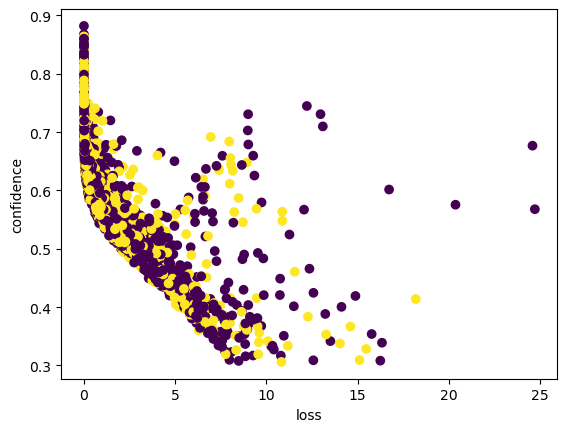

In [5]:
visualize(train)

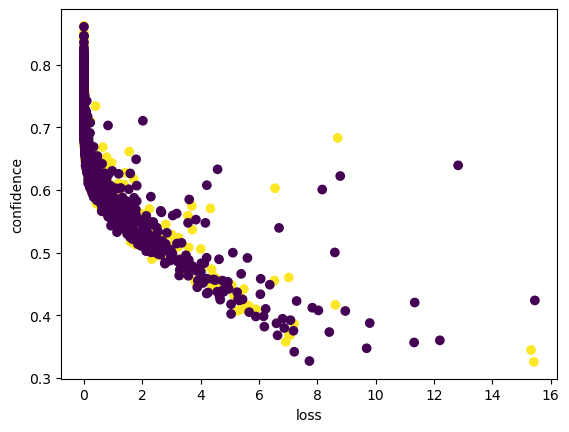

In [6]:
visualize(val)

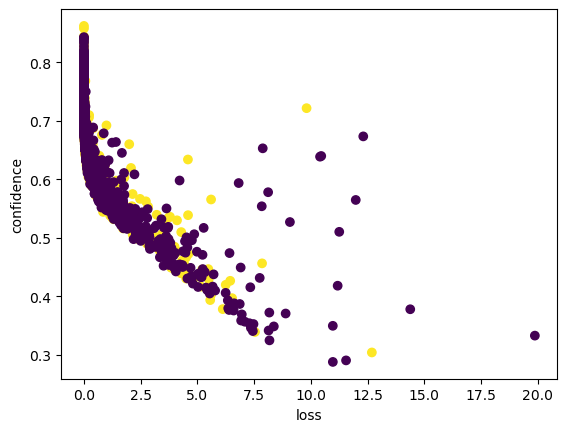

In [7]:
visualize(test)

## Evaluation

In [8]:
def classify(classifier, train, test):
    classifier.fit(train[:,:-1], train[:,-1])
    pred=classifier.predict(test[:,:-1])
    print(classification_report(test[:,-1],pred))
    RocCurveDisplay.from_estimator(classifier,test[:,:-1],test[:,-1])
    plt.show()

              precision    recall  f1-score   support

         0.0       0.55      0.40      0.46      2000
         1.0       0.53      0.68      0.59      2000

    accuracy                           0.54      4000
   macro avg       0.54      0.54      0.53      4000
weighted avg       0.54      0.54      0.53      4000



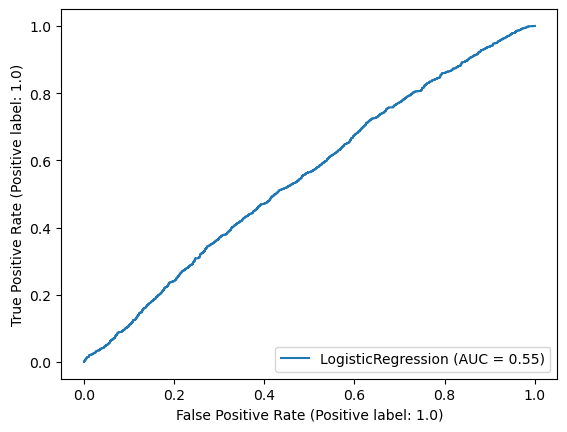

In [9]:
classify(LogisticRegression(),train,test)

              precision    recall  f1-score   support

         0.0       0.57      0.28      0.38      2000
         1.0       0.52      0.79      0.63      2000

    accuracy                           0.54      4000
   macro avg       0.55      0.54      0.50      4000
weighted avg       0.55      0.54      0.50      4000



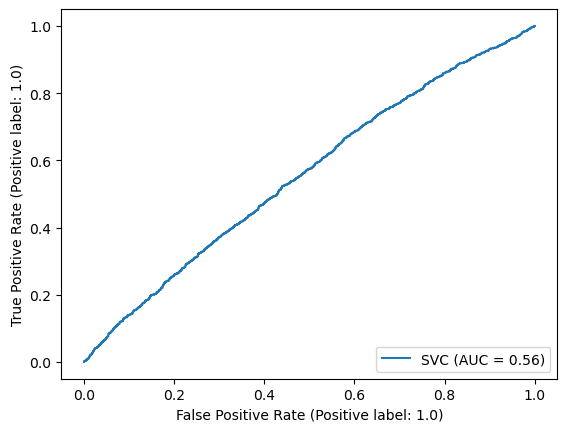

In [10]:
classify(SVC(),train,test)

              precision    recall  f1-score   support

         0.0       0.50      0.51      0.51      2000
         1.0       0.51      0.50      0.50      2000

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.50      4000
weighted avg       0.51      0.51      0.50      4000



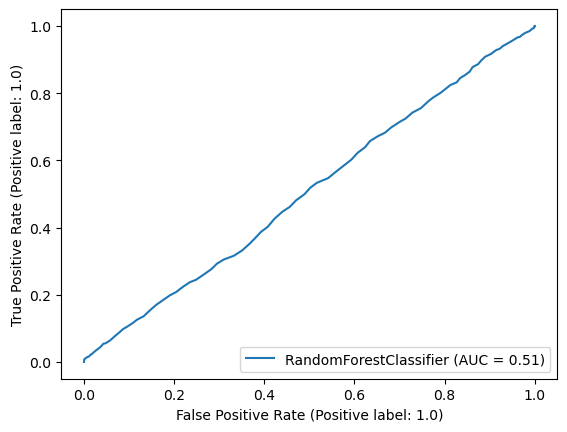

In [11]:
classify(RandomForestClassifier(),train,test)

              precision    recall  f1-score   support

         0.0       0.56      0.32      0.40      2000
         1.0       0.52      0.75      0.62      2000

    accuracy                           0.53      4000
   macro avg       0.54      0.53      0.51      4000
weighted avg       0.54      0.53      0.51      4000



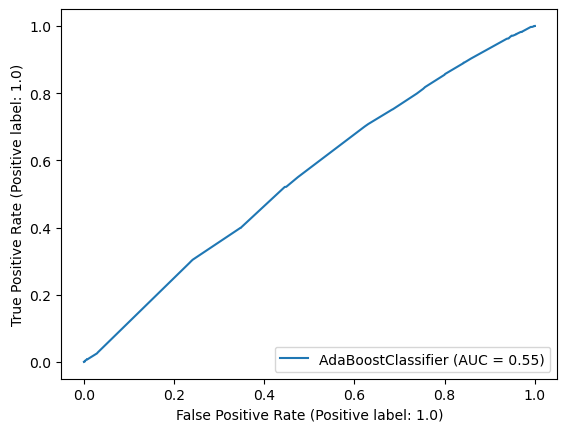

In [12]:
classify(AdaBoostClassifier(),train,test)

              precision    recall  f1-score   support

         0.0       0.55      0.36      0.44      2000
         1.0       0.53      0.71      0.60      2000

    accuracy                           0.54      4000
   macro avg       0.54      0.54      0.52      4000
weighted avg       0.54      0.54      0.52      4000



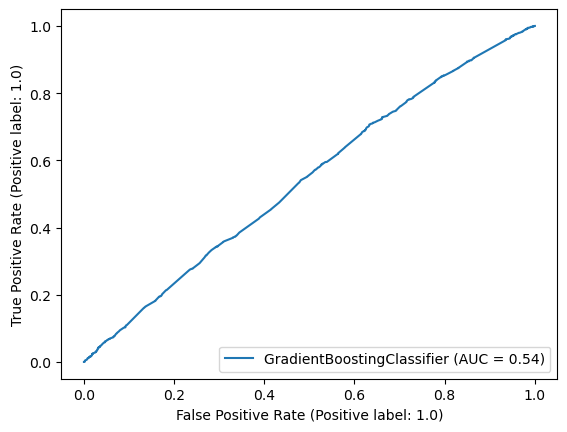

In [13]:
classify(GradientBoostingClassifier(),train,test)

              precision    recall  f1-score   support

         0.0       0.56      0.36      0.44      2000
         1.0       0.53      0.72      0.61      2000

    accuracy                           0.54      4000
   macro avg       0.55      0.54      0.52      4000
weighted avg       0.55      0.54      0.52      4000



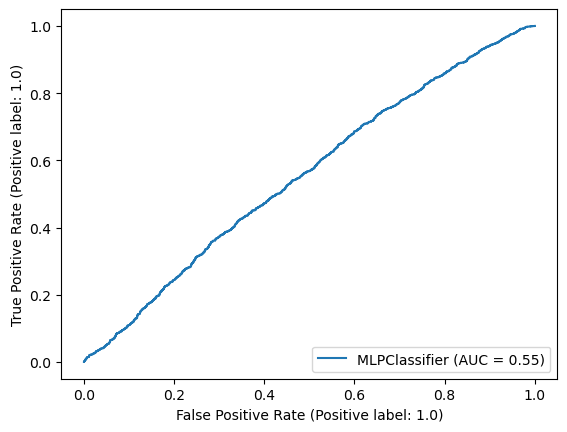

In [14]:
classify(MLPClassifier(),train,test)